   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


C:\Users\it\AppData\Local\Temp\ipykernel_27404\254414375.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset["tip"], kde=True, label=day)
C:\Users\it\AppData\Local\Temp\ipykernel_27404\254414375.py:40: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset["tip"], kde=True, label=day)
C:\U

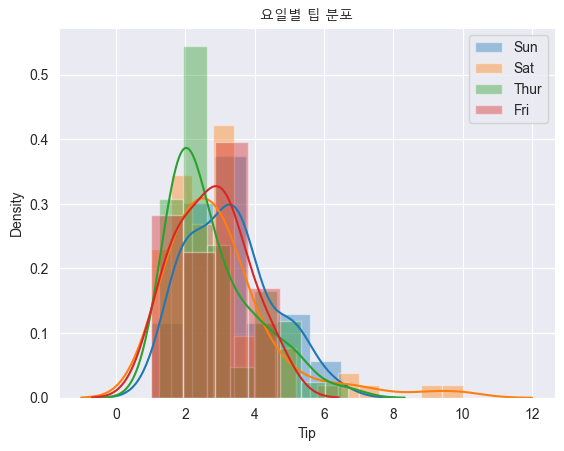

In [3]:
# 예제 1: 요일별 팁(tip) 분포 비교하기
#
# 문제 설명
# tips 데이터셋을 불러와서,
# 요일(day)별 팁(tip)의 분포를 시각화하고 비교해보자.
# Seaborn의 distplot 또는 histplot 함수를 사용한다.
#
# # 1. tips 데이터셋 불러오기
# tips = sns.load_dataset("tips")
# print(tips.head())
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")
print(tips.head())

# 2. 그래프 스타일 설정
sns.set_style("darkgrid")

# 3. 요일별 distplot/histplot 그리기
days = tips["day"].unique()
print(days)

for day in days:
    # 현재 반복 중인 day와 일치하는 행들만 필터링하여 subset 데이터프레임에 저장합니다.
    # 즉, 해당 요일에 해당하는 팁 데이터를 따로 추출합니다.
    subset = tips[tips["day"] == day]
    sns.distplot(subset["tip"], kde=True, label=day)
plt.title("요일별 팁 분포", fontproperties=font_prop)
plt.xlabel("Tip")
plt.ylabel("Density")
plt.legend()
plt.show()
#
#


   total_bill   tip  size
0       16.99  1.01     2
1       10.34  1.66     3
2       21.01  3.50     3
3       23.68  3.31     2
4       24.59  3.61     4
            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


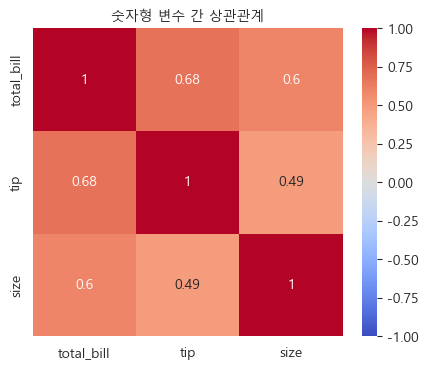

In [6]:
# 예제 2: 숫자형 변수 간 상관관계 히트맵 그리기
#
# 문제 설명
# tips 데이터셋에서 숫자형 열(예: total_bill, tip, size)을 골라
# 상관계수를 구하고 히트맵으로 시각화한다.
# Seaborn의 heatmap 함수를 사용한다.
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 숫자형 변수만 골라서 새로운 데이터프레임 생성
num_cols = ["total_bill", "tip", "size"]
heatmap_data = tips[num_cols]
print(heatmap_data.head())

# 3. 상관계수 계산
corr_matrix = heatmap_data.corr()
print(corr_matrix.head())

# 4. 히트맵 시각화
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("숫자형 변수 간 상관관계", fontproperties=font_prop)
plt.show()
#
#


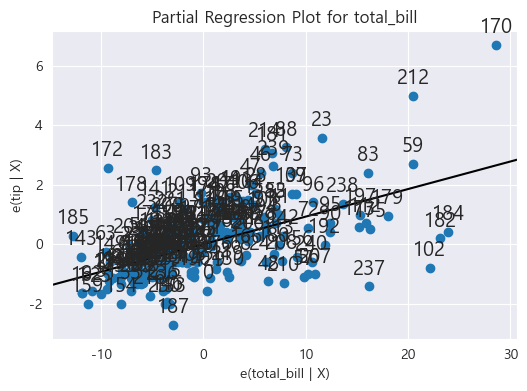

In [7]:
# 예제 3: 회귀 모델 적합 및 부분 회귀 플롯(Partial Regression Plot) 확인하기
# 문제 설명
# tips 데이터셋에서 종속 변수를 tip으로 하고,
# 독립 변수로 total_bill과 size를 사용하여 간단한 선형 회귀 모델을 적합한다.
# statsmodels의 OLS 회귀를 사용한 뒤,
# 부분 회귀 플롯으로 total_bill이 tip에 미치는 순수한 영향력을 시각화해본다.

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress

# 1. tips 데이터셋 불러오기
tips = sns.load_dataset("tips")

# 2. 독립 변수와 종속 변수 분리
X = tips[["total_bill", "size"]]
y = tips["tip"]

# 3. 상수항 추가

# 회귀 모델에서 절편(intercept)을 추정할 수 있도록
# 독립 변수 행렬에 상수항(보통 1로 구성된 열)을 추가합니다.
X = sm.add_constant(X)

# 4. OLS 회귀 모델 적합
# sm.OLS(y, X)는 statsmodels 라이브러리에서 제공하는
# Ordinary Least Squares(OLS) 회귀 모델의 인스턴스를 생성하는 함수입니다.
# y는 종속 변수(예측하고자 하는 목표 값)입니다.
# X는 독립 변수(설명 변수)들의 행렬로, 일반적으로 상수항(절편)을 포함합니다.
model = sm.OLS(y, X).fit()

# 5. 부분 회귀 플롯(Partial Regression Plot)
fig, ax = plt.subplots(figsize=(6, 4))
plot_partregress("tip", "total_bill", ["size"], data=tips, ax=ax)
plt.title("Partial Regression Plot for total_bill")
plt.show()
